In [10]:
import numpy as np
import pandas as pd
import processi_EMGIT as em
import stochastic as st
import matplotlib.pyplot as plt
import pandas_datareader.data as web

%matplotlib inline

In [11]:
df = pd.read_excel('oxmanspx.xlsx', index_col=0, header=0)
RV=df['rv5_ss']
sq = lambda a: np.sqrt(a)
rv=sq(pd.Series.to_list(RV[0:4900]))
#rv=[]
#rv.append(RV['rv10_ss'])
#rr=RV.iloc[2253:2504]
rr2000=sq(pd.Series.to_list(RV[0:251]))
rr2001=sq(pd.Series.to_list(RV[252:501]))
rr2002=sq(pd.Series.to_list(RV[502:753]))
rr2008=sq(pd.Series.to_list(RV[2000:2252]))
rr2009=sq(pd.Series.to_list(RV[2253:2504]))
rr2010=sq(pd.Series.to_list(RV[2505:2756]))
rr2020=sq(pd.Series.to_list(RV[5017:5264]))
rr16=sq(pd.Series.to_list(RV[4015:5264]))#4015
#rv.plot()
#plt.show()

In [32]:
L=252
P=np.linspace(1,15,100)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(rr16,L,P[p]))**2#x6[1]
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]

,W()_sigOU
1.0,0.000082


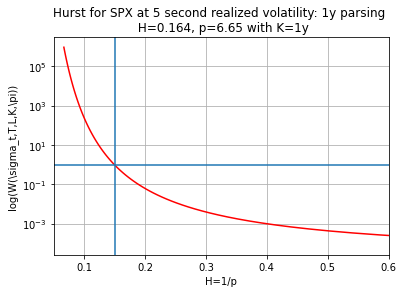

In [33]:
#dal 2016 al 2020 con num e den invertiti
plt.semilogy(H,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(W(\sigma_t,T,L,K,\pi))')
#plt.annotate('Expected', xy=(0.5, 0), xytext=(0.5, 1.5))#,arrowprops=dict(facecolor='black', shrink=0.05))
#plt.annotate('Cont-Das', xy=(0.56, 0), xytext=(0.56, 1))
#plt.annotate('Our', xy=(0.4851486301343279, 0), xytext=(0.4851486301343279, 1))
plt.title('Hurst for SPX at 5 second realized volatility from 2016 to 2022: 1y parsing \n H=0.164, p=6.65 with K=1y')
plt.grid(True)
plt.xlim(0.05,0.6)
plt.axvline(x=1/6.656566	, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.show()

In [5]:
L=90
P=np.linspace(1,15,100)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.W_1(rr2009,len(rr2009),L,P[p]))**2#x6[1]
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]

,W()_sigOU
1.0,4.367925e-07


In [ ]:
L=70
P=np.linspace(1,15,100)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(rr,L,P[p]))**2#x6[1]
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]

In [ ]:
plt.semilogy(H,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(||W(\sigma_t,T,L,K,\pi)-1||_^2-1)')
plt.annotate('Expected', xy=(0.5, 0), xytext=(0.5, 1.5))#,arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Cont-Das', xy=(0.56, 0), xytext=(0.56, 1))
#plt.annotate('Our', xy=(0.4851486301343279, 0), xytext=(0.4851486301343279, 1))
plt.title('Hurst for SPX at 5 second realized volatility: Series for 2009 \n H=0.164, p=6.09 with K=90')
plt.grid(True)
plt.xlim(0.05,0.6)
plt.axvline(x=1/6.090909, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.show()

cazzate varie
==========================

fai la stessa cosa per diversi indici e annate e poi ci siamo

In [38]:
df = pd.read_excel('oxmanftsemib.xlsx', index_col=0, header=0)
RV=df['rv5_ss']
sq = lambda a: np.sqrt(a)
rv=sq(pd.Series.to_list(RV[0:3298]))
rr16=sq(pd.Series.to_list(RV[1676:2938]))



In [66]:
L=252
P=np.linspace(1,15,100)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(rv,L,P[p]))**2#x6[1]
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]

,W()_sigOU
1.0,0.000174


In [24]:

L=90#len(rv)
P=np.linspace(1,15,100)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(rr2020,L,P[p])-1)**2#x6[1]
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]


,W()_sigOU
1.0,0.992793


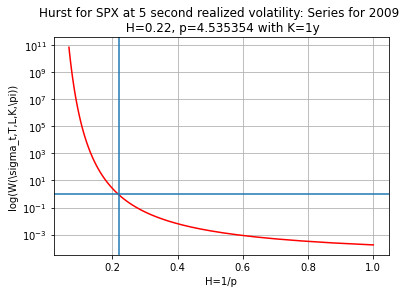

In [67]:
plt.semilogy(H,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(W(\sigma_t,T,L,K,\pi))')
plt.annotate('Expected', xy=(0.5, 0), xytext=(0.5, 1.5))#,arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Cont-Das', xy=(0.56, 0), xytext=(0.56, 1))
#plt.annotate('Our', xy=(0.4851486301343279, 0), xytext=(0.4851486301343279, 1))
plt.title('Hurst for FTSE MiB at 5 second realized volatility: Series from 2000/2022 \n H=0.22, p=4.535354 with K=1y')
plt.grid(True)
#plt.xlim(0.05,0.6)
plt.axvline(x=1/4.535354, ymin=0.0, ymax=7)
plt.axhline(y=1)
plt.show()

In [ ]:
L=70
P=np.linspace(1,15,100)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.calcW(rr2010,L,P[p]))**2#x6[1]
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]

,W()_sigOU
15.0,0.00001


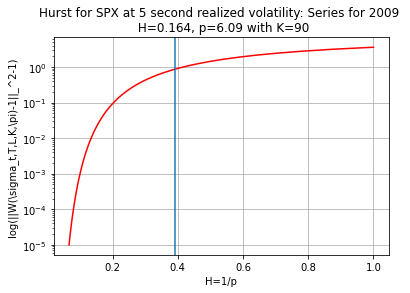

In [ ]:
plt.semilogy(H,w,'r')
plt.xlabel('H=1/p')
plt.ylabel('log(||W(\sigma_t,T,L,K,\pi)-1||_^2-1)')
plt.annotate('Expected', xy=(0.5, 0), xytext=(0.5, 1.5))#,arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Cont-Das', xy=(0.56, 0), xytext=(0.56, 1))
#plt.annotate('Our', xy=(0.4851486301343279, 0), xytext=(0.4851486301343279, 1))
plt.title('Hurst for SPX at 5 second realized volatility: Series for 2009 \n H=0.164, p=6.09 with K=90')
plt.grid(True)
#plt.xlim(0.05,0.6)
plt.axvline(x=1/2.555556, ymin=0.0, ymax=7)
#plt.axhline(y=1,xmin=0.,xmax=1)
plt.show()

In [ ]:
1/2.838384

0.3523131471992514

In [ ]:
1/3.571429

0.279999966400004